In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC



from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

## Read the data set

In [4]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# chak shape in dataset
df.shape

(119390, 32)

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

 # now clean the dataframe

In [9]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


#### Drop the colomn

In [10]:
df.drop('assigned_room_type', axis=1, inplace=True)

In [11]:
df.drop('company', axis=1, inplace=True)


In [12]:
df.drop('distribution_channel', axis=1, inplace=True)

In [13]:
df.drop('reservation_status_date', axis=1, inplace=True)

In [14]:
df.drop('reservation_status', axis=1, inplace=True)

In [15]:
df.drop('meal', axis=1, inplace=True)

In [16]:
df.drop('country', axis=1, inplace=True)

#### Fill the value

In [17]:
df["is_canceled"].fillna(df["is_canceled"].mean(), inplace=True)


In [18]:
df["agent"].fillna(df["agent"].mean(), inplace=True)

In [19]:
df["agent"].value_counts()

agent
9.000000      28759
240.000000    13028
94.138306     12193
14.000000      3349
7.000000       3300
              ...  
257.000000        1
291.000000        1
93.000000         1
483.000000        1
449.000000        1
Name: count, Length: 334, dtype: int64

In [20]:
df["children"].fillna(0, inplace=True)

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

# Data Analysis

##### finding num of booking for each hotel

In [22]:
df['hotel'].value_counts()

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64

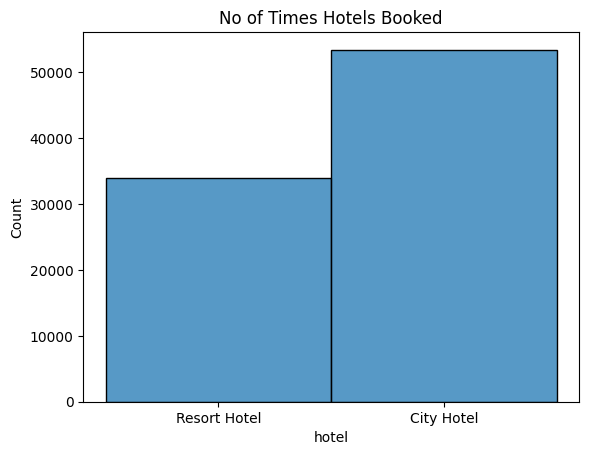

In [23]:
sns.histplot(df['hotel'])
plt.title('No of Times Hotels Booked')
plt.show()

#### Total Numbers of Adults, Babies, Childern Comes in Each Hotel.

In [24]:
adults = (df.groupby('hotel')['adults'].sum())
children =(df.groupby('hotel')['children'].sum())
babies = (df.groupby('hotel')['babies'].sum())


final_Transpose = pd.concat([adults, children, babies], ignore_index=False, axis=1).T
final_Transpose




hotel,City Hotel,Resort Hotel
adults,100249.0,63688.0
children,7044.0,5072.0
babies,392.0,554.0


In [25]:
final_Transpose.reset_index(inplace=True)
final_Transpose

hotel,index,City Hotel,Resort Hotel
0,adults,100249.0,63688.0
1,children,7044.0,5072.0
2,babies,392.0,554.0


In [26]:
final_Transpose.rename({'index':'Category',},axis=1, inplace=True)
final_Transpose

hotel,Category,City Hotel,Resort Hotel
0,adults,100249.0,63688.0
1,children,7044.0,5072.0
2,babies,392.0,554.0


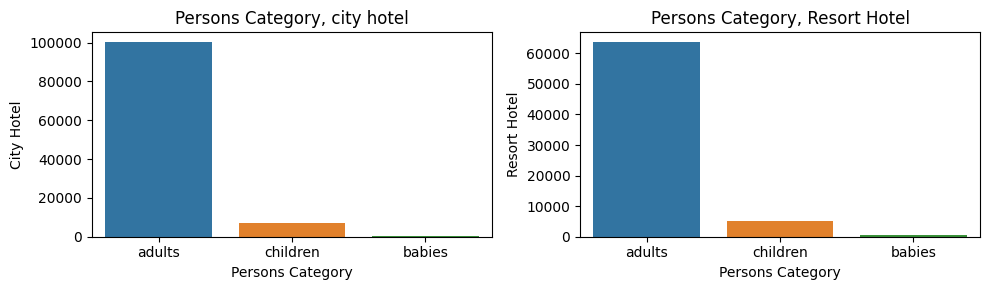

In [27]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.barplot(x="Category", y="City Hotel", data=final_Transpose)
plt.title("Persons Category, city hotel")
plt.xlabel("Persons Category")


plt.subplot(1,2,2)
sns.barplot(x="Category", y="Resort Hotel", data=final_Transpose)
plt.title("Persons Category, Resort Hotel")
plt.xlabel("Persons Category")
plt.tight_layout()
plt.show()

#### How many customers Arrived in each years (2015, 2016, 2017) accoring to each hotel

In [28]:
df['Total People'] = df['adults'] + df['children'] + df['babies']

In [29]:
df['Total People'].value_counts()

Total People
2.0     57057
1.0     16072
3.0     10078
4.0      3870
0.0       166
5.0       136
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: count, dtype: int64

In [30]:
yearStats = (df.groupby('arrival_date_year')['Total People'].sum()).reset_index()

yearStats

,arrival_date_year,Total People
0,2015,25970.0
1,2016,85420.0
2,2017,65609.0


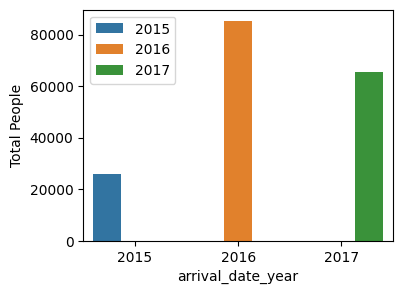

In [31]:
plt.figure(figsize=(4, 3))
sns.barplot(x='arrival_date_year', y='Total People', data=yearStats, hue= 'arrival_date_year')
plt.legend(loc='upper left')
plt.show()

#### Total No of Peoples Come with respect to each Month and Also tell with each year

In [32]:
monthStats =(df.groupby('arrival_date_month')['Total People'].sum()).reset_index()

monthStats

,arrival_date_month,Total People
0,April,16063.0
1,August,25645.0
2,December,10265.0
3,February,11847.0
4,January,8601.0
5,July,22622.0
6,June,15834.0
7,March,14338.0
8,May,16359.0
9,November,8819.0


In [33]:
stat_2015 =(df[df['arrival_date_year'] == 2015].groupby('arrival_date_month')['Total People'].sum()).reset_index()

stat_2015

,arrival_date_month,Total People
0,August,5226.0
1,December,3837.0
2,July,3568.0
3,November,2806.0
4,October,5054.0
5,September,5479.0


In [34]:
stat_2016 = (df[df['arrival_date_year'] == 2016].groupby('arrival_date_month')['Total People'].sum()).reset_index()

stat_2016

,arrival_date_month,Total People
0,April,7418.0
1,August,10318.0
2,December,6428.0
3,February,5263.0
4,January,3225.0
5,July,8766.0
6,June,7048.0
7,March,7501.0
8,May,7367.0
9,November,6013.0


In [35]:
stat_2017 =(df[df['arrival_date_year'] == 2017].groupby('arrival_date_month')['Total People'].sum()).reset_index()

stat_2017

,arrival_date_month,Total People
0,April,8645.0
1,August,10101.0
2,February,6584.0
3,January,5376.0
4,July,10288.0
5,June,8786.0
6,March,6837.0
7,May,8992.0


<function matplotlib.pyplot.show(close=None, block=None)>

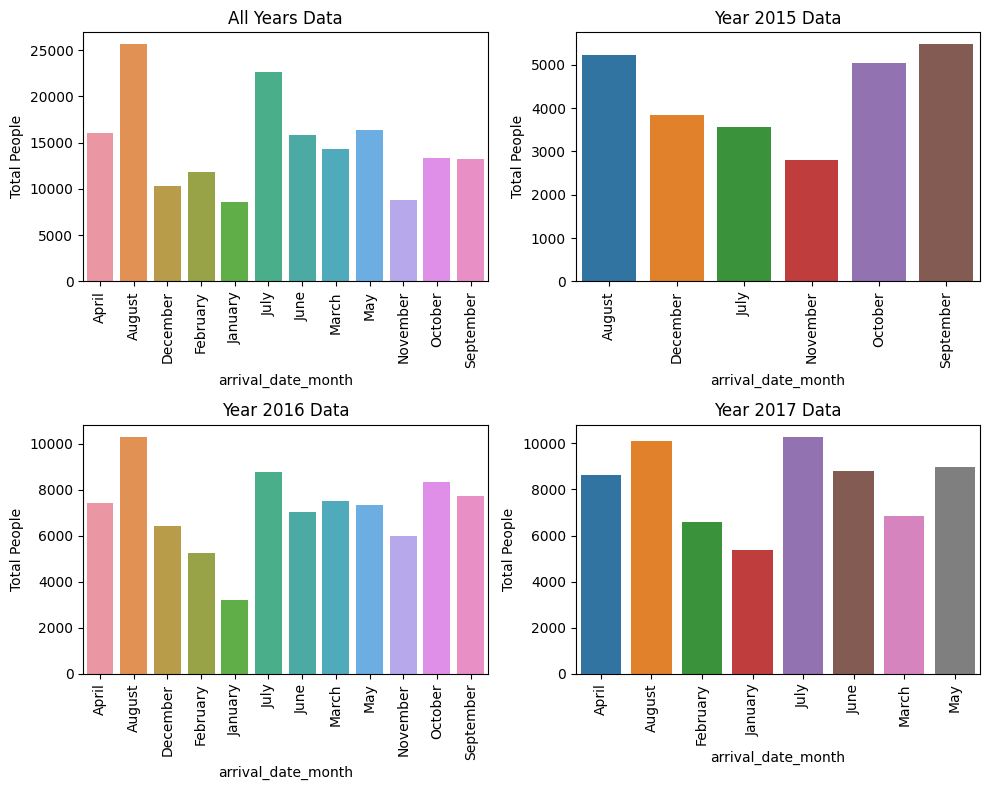

In [36]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.barplot(x='arrival_date_month', y='Total People', data = monthStats)
plt.xticks(rotation=90)
plt.title("All Years Data")

plt.subplot(2,2,2)
sns.barplot(x='arrival_date_month', y='Total People', data = stat_2015)
plt.xticks(rotation=90)
plt.title("Year 2015 Data")

plt.subplot(2,2,3)
sns.barplot(x='arrival_date_month', y='Total People', data = stat_2016)
plt.xticks(rotation=90)
plt.title("Year 2016 Data")

plt.subplot(2,2,4)
sns.barplot(x='arrival_date_month', y='Total People', data = stat_2017)
plt.xticks(rotation=90)
plt.title("Year 2017 Data")





plt.tight_layout()
plt.show

##### Avg days in terms of weekend, non weekend

In [37]:
df[['hotel', 'stays_in_weekend_nights']]
week_night_Stats = (df.groupby('hotel')[[ 'stays_in_week_nights','stays_in_week_nights']].mean())
week_night_Stats

,stays_in_week_nights,stays_in_week_nights
hotel,,
City Hotel,2.274444,2.274444
Resort Hotel,3.177402,3.177402


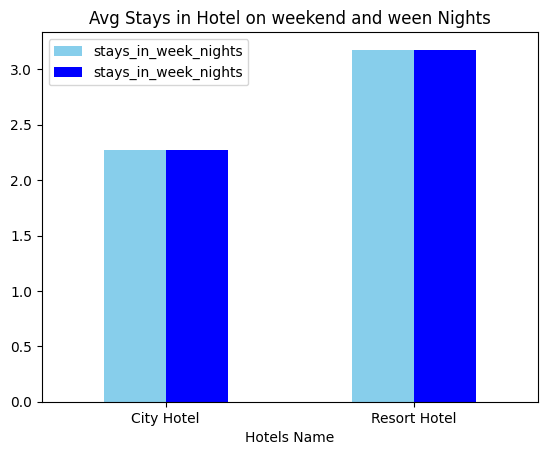

In [38]:
week_night_Stats.plot.bar(rot=0, color=['skyblue', 'blue'])
plt.title('Avg Stays in Hotel on weekend and ween Nights')
plt.xlabel("Hotels Name")
plt.show()

In [39]:
CityHotel_ADR = (df[df['hotel'] == 'City Hotel'].groupby('arrival_date_month')['adr'].mean())

ResortHotel_ADR = (df[df['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['adr'].mean())

Hotel_ADR = pd.concat([CityHotel_ADR, ResortHotel_ADR], axis=1)
Hotel_ADR.rename({'adr':'City Hotel ADR'},axis=1, inplace=True)
Hotel_ADR.rename({'adr':'Resort Hotel ADR'},axis=1, inplace=True)
Hotel_ADR

,City Hotel ADR,City Hotel ADR
arrival_date_month,,
April,117.156250,79.283805
August,124.901601,187.566659
December,92.717339,65.409093
February,88.945304,54.081107
January,85.092612,49.131584
July,120.055385,156.166914
June,123.836342,112.340141
March,94.763375,57.569213
May,127.851240,80.551101


#### Hotel avg daily Rate and how it changes with respect to Month

<Figure size 1400x500 with 0 Axes>

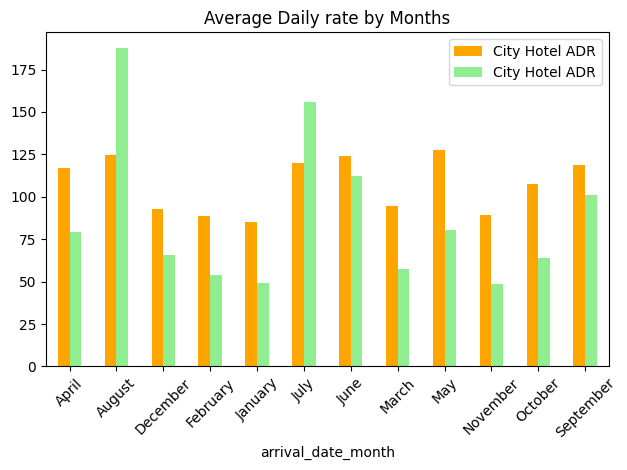

In [40]:
plt.figure(figsize=(14,5))
Hotel_ADR.plot.bar(rot=45, color=['orange', 'lightgreen'])
plt.title('Average Daily rate by Months')
plt.tight_layout()
plt.show()

#### Customer Type count stays in each Hotel

In [41]:
Cust_Type =(df.groupby(['hotel', 'customer_type'])['Total People'].sum())
Cust_Type

hotel         customer_type  
City Hotel    Contract            2952.0
              Group                497.0
              Transient          92288.0
              Transient-Party    11948.0
Resort Hotel  Contract            3337.0
              Group                843.0
              Transient          56611.0
              Transient-Party     8523.0
Name: Total People, dtype: float64

In [42]:
one =(df[df['hotel'] == 'City Hotel'].groupby(['customer_type'])['Total People'].sum())

Two = (df[df['hotel'] == 'Resort Hotel'].groupby(['customer_type'])['Total People'].sum())

result = pd.concat([one, Two], axis = 1)
result.rename({'Total People': 'City Hotel Total People'} ,axis=1, inplace=True)
result.rename({'Total People': 'Resort Hotel Total People'}, axis=1, inplace=True)
result

,City Hotel Total People,City Hotel Total People
customer_type,,
Contract,2952.0,3337.0
Group,497.0,843.0
Transient,92288.0,56611.0
Transient-Party,11948.0,8523.0


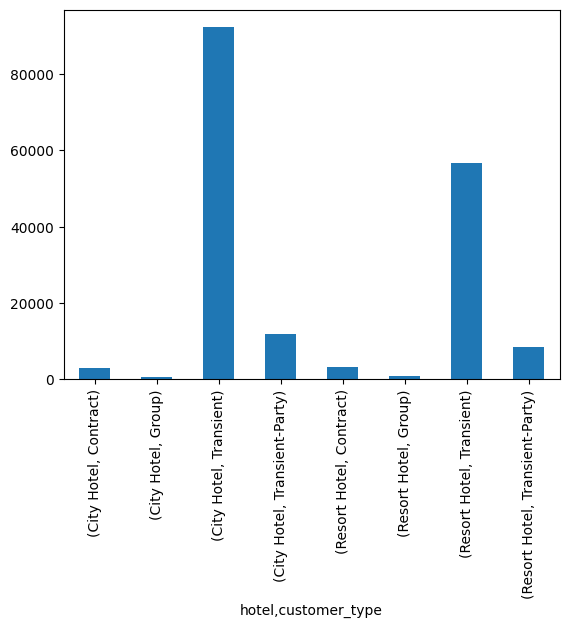

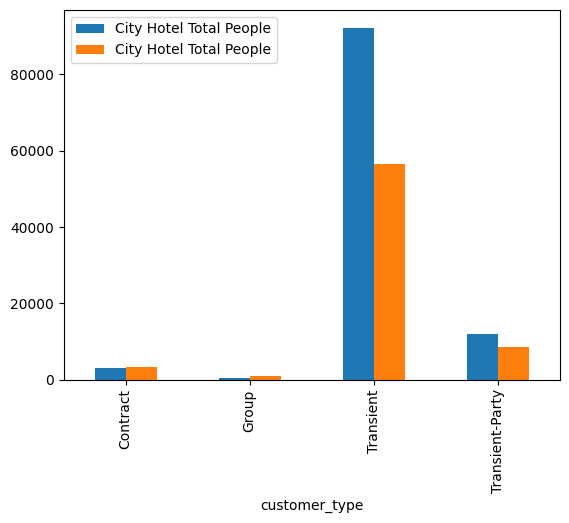

In [43]:

Cust_Type.plot.bar(rot=90)

result.plot.bar(rot=90)

plt.show()

### People who reserve room and get different room

In [44]:
df_grouped =df.groupby(['arrival_date_month', 'days_in_waiting_list'])['is_canceled'].count().reset_index()

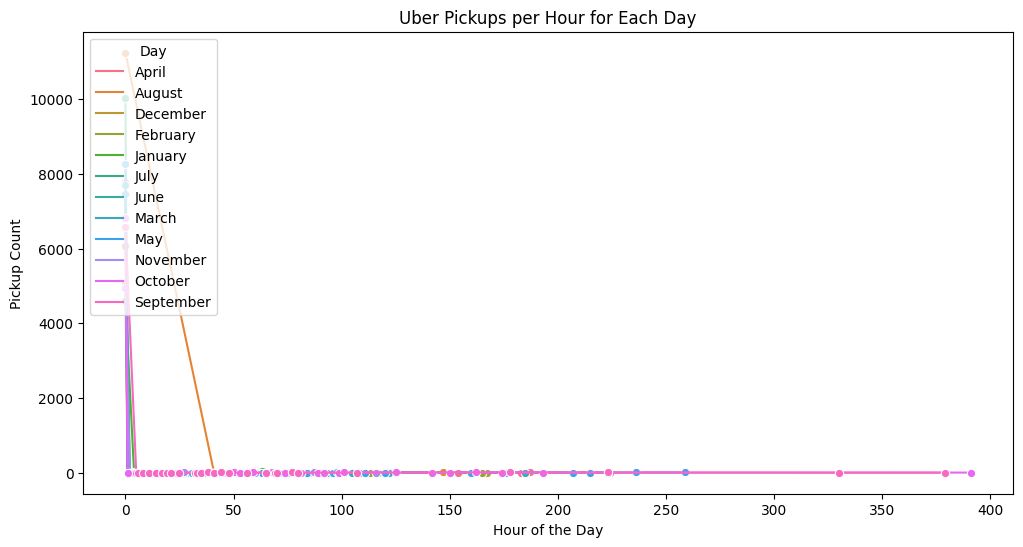

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='days_in_waiting_list', y='is_canceled', hue='arrival_date_month' ,marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickup Count')
plt.title('Uber Pickups per Hour for Each Day')
plt.legend(title='Day', loc='upper left')
plt.show()

# feature engring/ Mapping

In [46]:
df['hotel'].value_counts()

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64

In [47]:
Labels = ['City Hotel', 'Resort Hotel']

mapping = {label:i for i, label in enumerate(Labels)}
df['hotel'] = df['hotel'].map(mapping)


In [48]:
Labels = ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mapping = {label:i for i, label in enumerate(Labels)}
df['arrival_date_month'] = df['arrival_date_month'].map(mapping)
df['arrival_date_month'].value_counts()

arrival_date_month
7     11257
6     10057
4      8355
3      7908
5      7765
2      7513
9      6934
8      6690
1      6098
11     5131
10     4995
0      4693
Name: count, dtype: int64

In [49]:
Labels = ['Undefined', 'Online TA','Offline TA/TO', 'Direct', 'Groups', 'Corporate', 'Complementary', 'Aviation']
mapping = {label:i for i, label in enumerate(Labels)}
df['market_segment'] = df['market_segment'].map(mapping)
df['market_segment'].value_counts()

market_segment
1    51618
2    13889
3    11804
4     4942
5     4212
6      702
7      227
0        2
Name: count, dtype: int64

In [50]:
df['reserved_room_type'].value_counts()

reserved_room_type
A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: count, dtype: int64

In [51]:
Labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L']

mapping = {label:i for i, label in enumerate(Labels)}
df['reserved_room_type'] = df['reserved_room_type'].map(mapping)



In [52]:
Labels = ['No Deposit', 'Non Refund','Refundable']
mapping = {label:i for i, label in enumerate(Labels)}
df['deposit_type'] = df['deposit_type'].map(mapping)
df['deposit_type'].value_counts()

deposit_type
0    86251
1     1038
2      107
Name: count, dtype: int64

In [53]:
Labels = ['Transient', 'Transient-Party','Contract', 'Group']
mapping = {label:i for i, label in enumerate(Labels)}
df['customer_type'] = df['customer_type'].map(mapping)
df['customer_type'].value_counts()

customer_type
0    71986
1    11727
2     3139
3      544
Name: count, dtype: int64

In [54]:
Scaler = MinMaxScaler()
numerical_features = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent',
'adr','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests' ]
df[numerical_features] = Scaler.fit_transform(df[numerical_features])

##### machine learning start

As Its a Classification Problem so using models like:
- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier 

In [55]:
x=df.drop('is_canceled', axis=1)
y=df['is_canceled']

### Train test split on data

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y  ,test_size=0.3, random_state=10)

### Logistic regression model traing

In [57]:
dtr_model= LogisticRegression()
dtr_model.fit(x_train,y_train)

C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
y_pred = dtr_model.predict(x_test)
Accuracy_LR = accuracy_score(y_test, y_pred)
Accuracy_LR

0.764865174110378

### Dession tree regression model traing

In [84]:
model= DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred = model.predict(x_test)
Accuracy_DT = accuracy_score(y_test, y_pred)
Accuracy_DT

0.7560929097219573

### Random Forest Classifier

In [61]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
y_pred = model.predict(x_test)
Accuracy_RF = accuracy_score(y_test, y_pred)
Accuracy_RF

0.7591441321179297

# Haper Tunning

### Hyper Tunning On Decision Tree and Rnadom Forest

#### DecisionTreeClassifier

In [63]:
param_grid = {
    'max_depth': [2, 1, 5, 15, 10, 20],
    'min_samples_split': [1, 4, 2, 5, 10],
    'min_samples_leaf': [3, 1, 3, 4, 5, 6],
    'max_features': [1.0, 'sqrt']
}

#### grid search

In [64]:
model = DecisionTreeClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 1, 5, 15, 10, 20],
                         'max_features': [1.0, 'sqrt'],
                         'min_samples_leaf': [3, 1, 3, 4, 5, 6],
                         'min_samples_split': [1, 4, 2, 5, 10]})

In [65]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy_HPT_GS = accuracy_score(y_test,y_pred)
accuracy_HPT_GS

0.8032342957397307

#### Random search

In [66]:
param_dist_RS = {
    'max_depth': [2, 7, 5, 15, 10, 20],
    'min_samples_split': randint(1, 40),
    'min_samples_leaf': randint(1, 30),
    'max_features': [1.0, 'sqrt']
}

In [67]:
model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist_RS, n_iter=10, cv=5)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 7, 5, 15, 10, 20],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000232E1B9A2F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000232E1B99780>})

In [68]:
best_model = random_search.best_estimator_
Y_pred = best_model.predict(x_test)
accuracy_HPT_DT_RS = accuracy_score(y_test,y_pred)
accuracy_HPT_DT_RS

0.8032342957397307

Redomforest

In [69]:
param_grid = {
    'max_depth': [2, 4, 6, 8,10],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [70]:
model = RandomForestClassifier(n_estimators = 10) 
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

In [73]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [97]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy_H_RF = accuracy_score(y_test,y_pred)
accuracy_H_RF

0.8102139669705176

# svm

In [76]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(x_train.head(30000), y_train.head(30000))

SVC(kernel='linear')

In [77]:
Y_pred = svm_classifier.predict(x_test)

In [78]:
Accuracy_SVM = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#print(classification_report(Y_test, Y_pred))
Accuracy_SVM

0.8102139669705176

In [105]:
data = {"Accuracy": ["Logistic Regression", "DecisionTreeClassifier", "RandomForestClassifier", "DecisionTreeClassifier HPT GS", "DecisionTreeClassifier HPT RS", "RandomForestClassifier HPT GS","svm_classifier"],
        "Values": [Accuracy_LR, Accuracy_DT, accuracy_RF, accuracy_HPT_GS, accuracy_HPT_DT_RS, accuracy_HPT_RF,Accuracy_SVM]}

In [106]:
DF = pd.DataFrame(data)
DF

,Accuracy,Values
0,Logistic Regression,0.764865
1,DecisionTreeClassifier,0.759144
2,RandomForestClassifier,0.819825
3,DecisionTreeClassifier HPT GS,0.803234
4,DecisionTreeClassifier HPT RS,0.803234
5,RandomForestClassifier HPT GS,0.810214
6,svm_classifier,0.810214
